<a href="https://colab.research.google.com/github/szeshiang/Deep-Learning/blob/main/Lending_Club_Loan_Project_2_Mar_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification project** - regression project in this case because of 0 and 1

In [1]:
# import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all libs imported')

all libs imported


In [2]:
# import loan data
data=pd.read_csv('loan_data.csv')

In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

**Exploratory data analysis of different factors of the dataset**

<Axes: >

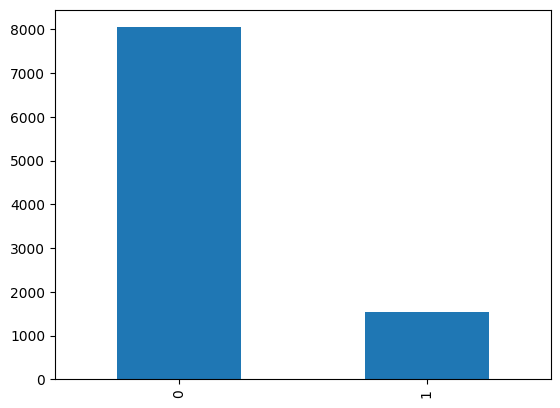

In [6]:
data['not.fully.paid'].value_counts().plot(kind='bar')

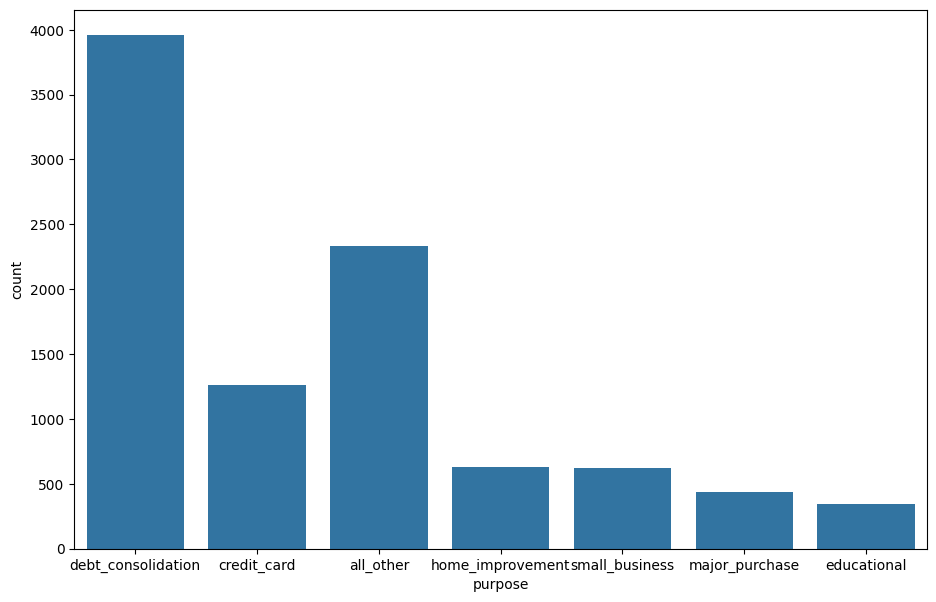

In [8]:
# purpose
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'])
plt.show()

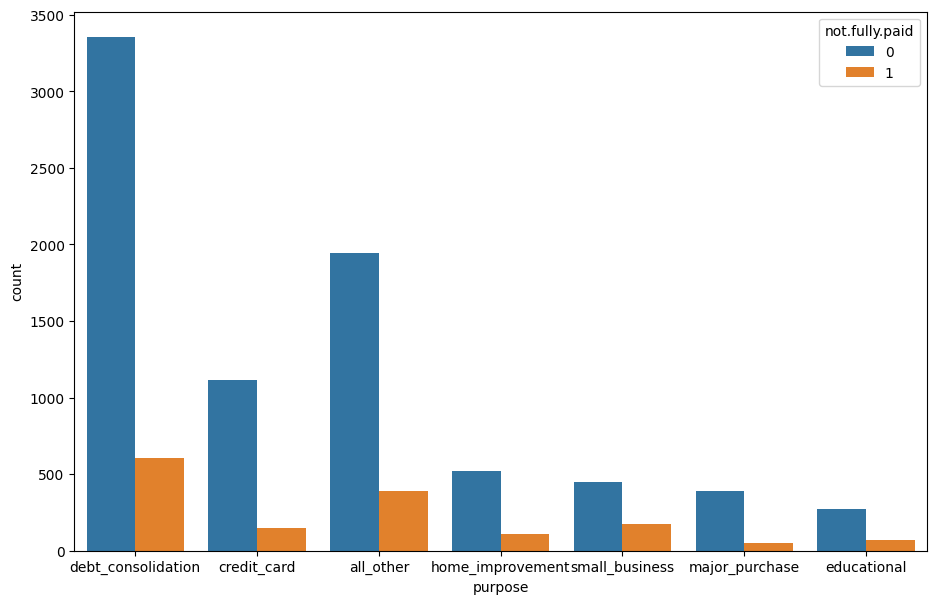

In [9]:
# purpose
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'],hue='not.fully.paid', data=data)
plt.show()

**Handle imbalance Data**

In [14]:
not_fully_paid_0=data[data['not.fully.paid']==0]
not_fully_paid_1=data[data['not.fully.paid']==1]


In [15]:
not_fully_paid_0.shape

(8045, 14)

In [12]:
not_fully_paid_1.shape

(1533, 14)

In [16]:
# resample; in this case it is sampling with replacement
from sklearn.utils import resample
minor_upsample=resample(not_fully_paid_1, replace=True, n_samples=8045)
new_df=pd.concat([not_fully_paid_0, minor_upsample])

# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [17]:
new_df.shape

(16090, 14)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 3598 to 113
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      16090 non-null  int64  
 1   purpose            16090 non-null  object 
 2   int.rate           16090 non-null  float64
 3   installment        16090 non-null  float64
 4   log.annual.inc     16090 non-null  float64
 5   dti                16090 non-null  float64
 6   fico               16090 non-null  int64  
 7   days.with.cr.line  16090 non-null  float64
 8   revol.bal          16090 non-null  int64  
 9   revol.util         16090 non-null  float64
 10  inq.last.6mths     16090 non-null  int64  
 11  delinq.2yrs        16090 non-null  int64  
 12  pub.rec            16090 non-null  int64  
 13  not.fully.paid     16090 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.8+ MB


In [23]:
# apply encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [25]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
3598,1,0,0.0932,31.95,11.350407,7.27,732,6510.000000,5690,21.5,0,0,0,0
9466,0,0,0.1287,622.22,11.260611,18.24,737,7560.041667,116601,89.6,2,0,0,1
7152,1,5,0.1025,161.93,10.404263,1.42,727,4470.000000,245,30.6,1,0,0,0
4882,1,2,0.1183,497.01,12.114484,9.26,732,5700.958333,75854,46.2,1,1,0,1
7374,1,6,0.1385,272.84,10.645425,10.83,677,4740.000000,5485,76.2,1,0,0,1


In [26]:
new_df['purpose'].value_counts()

2    6444
0    3997
1    1896
6    1360
4    1108
3     644
5     641
Name: purpose, dtype: int64

**Feature Engineering**

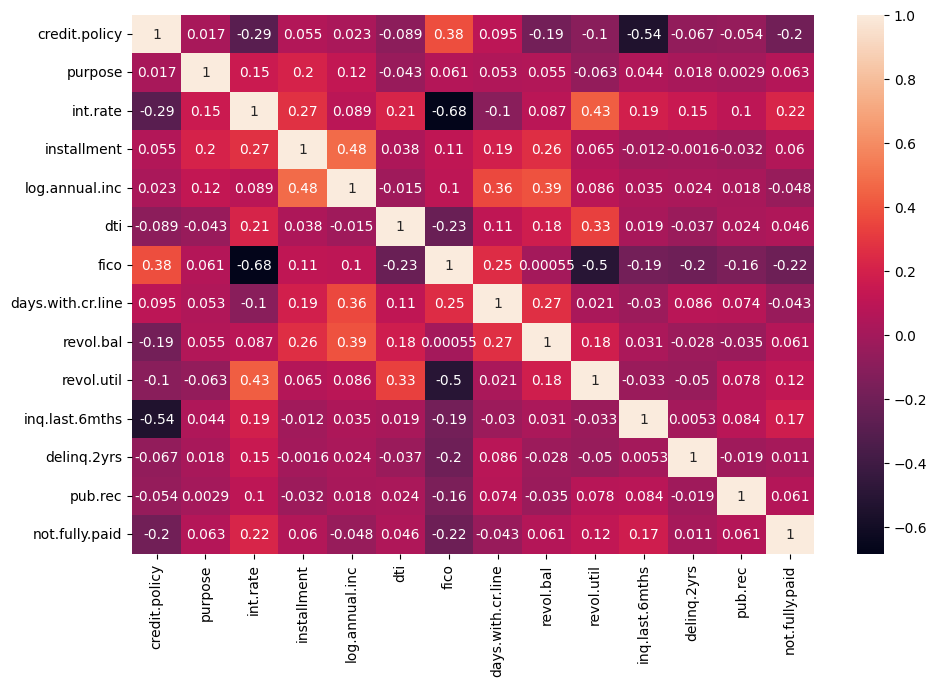

In [27]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [28]:
# see the corr
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.219874
fico                 0.215046
credit.policy        0.195013
inq.last.6mths       0.173579
revol.util           0.117075
purpose              0.063193
pub.rec              0.061152
revol.bal            0.060727
installment          0.059559
log.annual.inc       0.047581
dti                  0.046353
days.with.cr.line    0.042699
delinq.2yrs          0.011449
Name: not.fully.paid, dtype: float64

In [29]:
# Teacher mentioned to select features with corr of more than 0.05 threshold, depending on the problem and the corr results
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [30]:
# prepare the data
X=new_df[['credit.policy', 'purpose', 'int.rate', 'installment',
       'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec',]]

In [31]:
X.shape

(16090, 9)

9 - number of classes of input values

In [32]:
y=new_df[['not.fully.paid']]

In [33]:
# create train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# Apply standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
# import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
print('imported')

imported


In [45]:
# create architecture
# create ANN with 2 hidden layers, first hidden layer 19 neurons, second hidden layer 10 neurons, activation relu
# dropout 0.25, batchnormisation
model=Sequential()
# first hidden layer
model.add(Dense(19,activation='relu',input_shape=(9,)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
# second hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# output layer
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 19)                190       
                                                                 
 dropout_9 (Dropout)         (None, 19)                0         
                                                                 
 batch_normalization_6 (Bat  (None, 19)                76        
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 10)                200       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_7 (Bat  (None, 10)                40        
 chNormalization)                                     

In [47]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model is compiled')

model is compiled


In [48]:
# Early Stopping
early_stop=EarlyStopping(monitor='val_loss',
                         min_delta=0.01,
                         mode='min',
                         verbose=1,
                         patience=10)

In [49]:
history=model.fit(X_train,y_train,
                 epochs=50,
                validation_data=(X_test,y_test),
                  callbacks=[early_stop]
                  )

Epoch 1/50
403/403 [==============================] - 5s 6ms/step - loss: 0.7177 - accuracy: 0.5592 - val_loss: 0.6533 - val_accuracy: 0.6109
Epoch 2/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6773 - accuracy: 0.5791 - val_loss: 0.6520 - val_accuracy: 0.6125
Epoch 3/50
403/403 [==============================] - 2s 6ms/step - loss: 0.6679 - accuracy: 0.5930 - val_loss: 0.6485 - val_accuracy: 0.6184
Epoch 4/50
403/403 [==============================] - 3s 7ms/step - loss: 0.6621 - accuracy: 0.5982 - val_loss: 0.6486 - val_accuracy: 0.6196
Epoch 5/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6593 - accuracy: 0.6020 - val_loss: 0.6476 - val_accuracy: 0.6193
Epoch 6/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6590 - accuracy: 0.6053 - val_loss: 0.6457 - val_accuracy: 0.6237
Epoch 7/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6548 - accuracy: 0.6098 - val_loss: 0.6444 - val_accuracy: 0.6200
Epoch 

In [50]:
# print accuracy & loss
score_test=model.evaluate(X_test,y_test)
print('test score',score_test)

101/101 [==============================] - 1s 4ms/step - loss: 0.6416 - accuracy: 0.6268
test score [0.6415987014770508, 0.6267868280410767]


In [51]:
score_train=model.evaluate(X_train,y_train)
print('train score',score_test)

403/403 [==============================] - 2s 4ms/step - loss: 0.6404 - accuracy: 0.6271
train score [0.6415987014770508, 0.6267868280410767]


In [52]:
# create architecture
# create ANN with 3 hidden layers, first hidden layer 19 neurons, second hidden layer 10 neurons, second hidden layer 10 neurons, activation relu
# dropout 0.25, batchnormisation
model=Sequential()
# first hidden layer
model.add(Dense(19,activation='relu',input_shape=(9,)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
# second hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
# third hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

# output layer
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 19)                190       
                                                                 
 dropout_11 (Dropout)        (None, 19)                0         
                                                                 
 batch_normalization_8 (Bat  (None, 19)                76        
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 10)                200       
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_9 (Bat  (None, 10)                40        
 chNormalization)                                     

In [54]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model is compiled')

model is compiled


In [55]:
# Early Stopping
early_stop=EarlyStopping(monitor='val_loss',
                         min_delta=0.01,
                         mode='min',
                         verbose=1,
                         patience=10)

In [58]:
history=model.fit(X_train,y_train,
                 epochs=50,
                validation_data=(X_test,y_test))

Epoch 1/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6522 - accuracy: 0.6140 - val_loss: 0.6431 - val_accuracy: 0.6330
Epoch 2/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6516 - accuracy: 0.6180 - val_loss: 0.6422 - val_accuracy: 0.6339
Epoch 3/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6513 - accuracy: 0.6212 - val_loss: 0.6416 - val_accuracy: 0.6342
Epoch 4/50
403/403 [==============================] - 1s 4ms/step - loss: 0.6511 - accuracy: 0.6249 - val_loss: 0.6416 - val_accuracy: 0.6302
Epoch 5/50
403/403 [==============================] - 2s 4ms/step - loss: 0.6494 - accuracy: 0.6210 - val_loss: 0.6424 - val_accuracy: 0.6358
Epoch 6/50
403/403 [==============================] - 2s 6ms/step - loss: 0.6487 - accuracy: 0.6210 - val_loss: 0.6423 - val_accuracy: 0.6277
Epoch 7/50
403/403 [==============================] - 2s 6ms/step - loss: 0.6539 - accuracy: 0.6201 - val_loss: 0.6434 - val_accuracy: 0.6299
Epoch 

In [59]:
# print accuracy & loss for ANN with 3 hidden layers
score_test=model.evaluate(X_test,y_test)
print('test score',score_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6342
test score [0.6362429857254028, 0.6342448592185974]


3 x runs
1. ANN with 2 hidden layers
2. ANN with 3 hidden layers
3. ANN with 3 hidden layers with no early stopping

- increase in hidden layer does not improve accuracy much (sight)
- without early stopping, the accuracy is highest among the 3 runs; slight increase in accuracy from 0.627 to 0.63 to 0.634

In [60]:
score_train=model.evaluate(X_train,y_train)
print('test score',score_train)

403/403 [==============================] - 2s 5ms/step - loss: 0.6318 - accuracy: 0.6440
test score [0.6317563652992249, 0.6440335512161255]


In [62]:
# predictions
pred=(model.predict(X_test))
pred

101/101 [==============================] - 0s 3ms/step


array([[0.54694957],
       [0.7756813 ],
       [0.6287274 ],
       ...,
       [0.42858583],
       [0.5648137 ],
       [0.5936449 ]], dtype=float32)

In [65]:
predict=(pred>0.5).astype('int')
predict

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [63]:
y_test

,not.fully.paid
2193,0
2183,1
8630,1
8891,0
9017,1
...,...
6056,0
7885,1
5862,1
7687,0


[[ 989  588]
 [ 589 1052]]


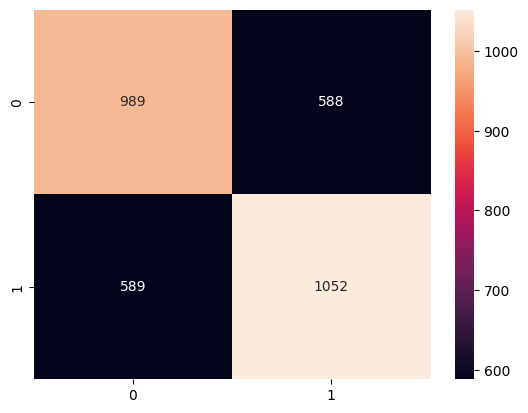

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [69]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1577
           1       0.64      0.64      0.64      1641

    accuracy                           0.63      3218
   macro avg       0.63      0.63      0.63      3218
weighted avg       0.63      0.63      0.63      3218

